In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                       n_clusters_per_class=2,n_redundant=0)

In [4]:
pd.DataFrame(x)

,0,1
0,-1.107102,-0.014863
1,1.069543,0.683006
2,-0.749447,1.147877
3,-0.318822,-0.380457
4,0.803670,-1.418070
...,...,...
995,0.346984,-0.042373
996,0.909007,-1.154216
997,-0.009834,-0.653815
998,-0.772741,0.243223


In [5]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,0
4,0
...,...
995,1
996,0
997,0
998,0


<Axes: xlabel='0', ylabel='1'>

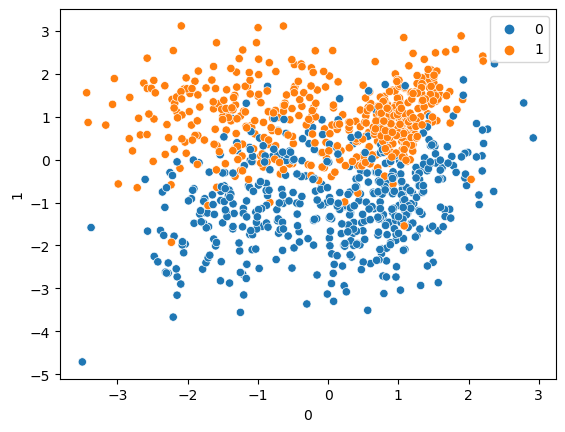

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=21)

In [84]:
from sklearn.svm import SVC

In [85]:
svc=SVC(kernel='linear')

In [86]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [87]:
y_pred=svc.predict(x_test)

In [88]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [89]:
svc.coef_

array([[-0.26297311,  1.70874069]])

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [91]:
confusion_matrix(y_pred,y_test)

array([[38,  4],
       [ 7, 51]])

In [92]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.93      0.88      0.90        58

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [93]:
print(accuracy_score(y_pred,y_test))

0.89


# Hyperparametere tuning with SVC

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameter={'kernel':('linear','rbf'),'C':[0,1,10,20,100]
          ,'gamma':[1,.1,.01,.001,.0001]}

In [96]:
gs=GridSearchCV(svc,parameter,refit=True,cv=5,verbose=3)

In [97]:
gs

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0, 1, 10, 20, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [98]:
gs_=gs.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=line

[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.861 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.872 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.861 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=10, gamm

[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.872 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.894 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.822 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.839 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.872 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.861 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ...C=100, gamma

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constrai

In [99]:
gs_.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [100]:
gs.best_score_

0.8733333333333333

In [101]:
gs.best_estimator_

SVC(C=100, gamma=0.01)

In [102]:
gs.best_index_

45

In [103]:
gs.classes_

array([0, 1])

In [104]:
y_pred=gs.predict(x_test)

In [105]:
confusion_matrix(y_pred,y_test)

array([[38,  4],
       [ 7, 51]])

In [106]:
accuracy_score(y_pred,y_test)

0.89

In [107]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.93      0.88      0.90        58

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

